## <p style="font-family: Times New Roman; font-size:1.4em;color:black;"> Seleção de Recursos (Feature Selection) </p>
<p style="font-family: Times New Roman; font-size:1.2em;color:blue;"> Objetivo: Entender a importância da seleção dos elementos contidos no Dataset, visando o domínio da manipulação destes para aplicação dos modelos e algoritmos de Machine Learning e construção dos chamados Boxplots. </p>

In [1]:
# Comando para importar/abrir um arquivo:
import pandas as pd
pd.set_option('display.max_columns', 50)
arquivo = pd.read_csv('C:/Users/amdua/OneDrive/Documentos/ArquivosPython/traffic-collision-data-from-2010-to-present.csv')

In [2]:
arquivo.head()

DR Number            Date Reported            Date Occurred  Time Occurred  \
0  191323054  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            130   
1  192020666  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000             15   
2  191616992  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            230   
3  191824082  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            730   
4  191616980  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            720   

   Area ID  Area Name  Reporting District  Crime Code Crime Code Description  \
0       13     Newton                1385         997      TRAFFIC COLLISION   
1       20    Olympic                2054         997      TRAFFIC COLLISION   
2       16   Foothill                1669         997      TRAFFIC COLLISION   
3       18  Southeast                1802         997      TRAFFIC COLLISION   
4       16   Foothill                1689         997      TRAFFIC COLLISION   

  MO Codes  Victim Age Victim Sex Victim Descent  Premise Code  \
0      NaN         NaN          F              H         101.0   
1      NaN        40.0          M              W         101.0   
2      NaN        18.0          M              W         101.0   
3     0605        23.0          M              H         101.0   
4      NaN         NaN          M              H         101.0   

  Premise Description                          Address  \
0              STREET  SAN PEDRO                    ST   
1              STREET  OLYMPIC                      BL   
2              STREET  TUJUNGA CANYON               BL   
3              STREET  88TH                         ST   
4              STREET                         CROCKETT   

                      Cross Street  \
0  SLAUSON                      AV   
1  KINGSLEY                     AV   
2  LA TUNA CANYON               RD   
3  MAIN                         ST   
4                          SUNLAND   

                                            Location  Zip Codes  \
0  {'longitude': '-118.2696', 'human_address': '{...    22352.0   
1  {'longitude': '-118.3031', 'human_address': '{...    22723.0   
2  {'longitude': '-118.2704', 'human_address': '{...     3222.0   
3  {'longitude': '-118.2739', 'human_address': '{...    22352.0   
4  {'longitude': '-118.3703', 'human_address': '{...    19335.0   

   Census Tracts  Precinct Boundaries  LA Specific Plans  Council Districts  \
0          786.0                858.0                7.0               13.0   
1          617.0                646.0                NaN               12.0   
2            5.0                227.0                NaN                1.0   
3          800.0                358.0                7.0               14.0   
4          166.0                272.0                NaN                3.0   

   Neighborhood Councils (Certified)  
0                               46.0  
1                               89.0  
2                                7.0  
3                               45.0  
4                               21.0

In [3]:
arquivo.shape

(502858, 24)

In [4]:
# O comando pd.get_dummies() serve para pegar todas as informações contidas na coluna inicial escolhida e separar em colunas
# independentes de forma binária, sendo o valor 1 para onde tal coluna é citada e 0 para onde não é citada:
area_encode = pd.get_dummies(arquivo['Area Name'])

In [5]:
area_encode.head()

77th Street  Central  Devonshire  Foothill  Harbor  Hollenbeck  Hollywood  \
0            0        0           0         0       0           0          0   
1            0        0           0         0       0           0          0   
2            0        0           0         1       0           0          0   
3            0        0           0         0       0           0          0   
4            0        0           0         1       0           0          0   

   Mission  N Hollywood  Newton  Northeast  Olympic  Pacific  Rampart  \
0        0            0       1          0        0        0        0   
1        0            0       0          0        1        0        0   
2        0            0       0          0        0        0        0   
3        0            0       0          0        0        0        0   
4        0            0       0          0        0        0        0   

   Southeast  Southwest  Topanga  Van Nuys  West LA  West Valley  Wilshire  
0          0          0        0         0        0            0         0  
1          0          0        0         0        0            0         0  
2          0          0        0         0        0            0         0  
3          1          0        0         0        0            0         0  
4          0          0        0         0        0            0         0

In [6]:
# O comando pd.concat() abaixo serve para concatenar/unir as colunas criadas, com a tabela original da variável arquivo:
concatenado = pd.concat([arquivo, area_encode], axis=1)
concatenado.drop('Area Name', axis = 1, inplace=True)

In [7]:
concatenado.head()

DR Number            Date Reported            Date Occurred  Time Occurred  \
0  191323054  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            130   
1  192020666  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000             15   
2  191616992  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            230   
3  191824082  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            730   
4  191616980  2019-11-30T00:00:00.000  2019-11-30T00:00:00.000            720   

   Area ID  Reporting District  Crime Code Crime Code Description MO Codes  \
0       13                1385         997      TRAFFIC COLLISION      NaN   
1       20                2054         997      TRAFFIC COLLISION      NaN   
2       16                1669         997      TRAFFIC COLLISION      NaN   
3       18                1802         997      TRAFFIC COLLISION     0605   
4       16                1689         997      TRAFFIC COLLISION      NaN   

   Victim Age Victim Sex Victim Descent  Premise Code Premise Description  \
0         NaN          F              H         101.0              STREET   
1        40.0          M              W         101.0              STREET   
2        18.0          M              W         101.0              STREET   
3        23.0          M              H         101.0              STREET   
4         NaN          M              H         101.0              STREET   

                           Address                     Cross Street  \
0  SAN PEDRO                    ST  SLAUSON                      AV   
1  OLYMPIC                      BL  KINGSLEY                     AV   
2  TUJUNGA CANYON               BL  LA TUNA CANYON               RD   
3  88TH                         ST  MAIN                         ST   
4                         CROCKETT                          SUNLAND   

                                            Location  Zip Codes  \
0  {'longitude': '-118.2696', 'human_address': '{...    22352.0   
1  {'longitude': '-118.3031', 'human_address': '{...    22723.0   
2  {'longitude': '-118.2704', 'human_address': '{...     3222.0   
3  {'longitude': '-118.2739', 'human_address': '{...    22352.0   
4  {'longitude': '-118.3703', 'human_address': '{...    19335.0   

   Census Tracts  Precinct Boundaries  LA Specific Plans  Council Districts  \
0          786.0                858.0                7.0               13.0   
1          617.0                646.0                NaN               12.0   
2            5.0                227.0                NaN                1.0   
3          800.0                358.0                7.0               14.0   
4          166.0                272.0                NaN                3.0   

   Neighborhood Councils (Certified)  77th Street  Central  Devonshire  \
0                               46.0            0        0           0   
1                               89.0            0        0           0   
2                                7.0            0        0           0   
3                               45.0            0        0           0   
4                               21.0            0        0           0   

   Foothill  Harbor  Hollenbeck  Hollywood  Mission  N Hollywood  Newton  \
0         0       0           0          0        0            0       1   
1         0       0           0          0        0            0       0   
2         1       0           0          0        0            0       0   
3         0       0           0          0        0            0       0   
4         1       0           0          0        0            0       0   

   Northeast  Olympic  Pacific  Rampart  Southeast  Southwest  Topanga  \
0          0        0        0        0          0          0        0   
1          0        1        0        0          0          0        0   
2          0        0        0        0          0          0        0   
3          0        0        0        0          1          0        0   
4      

In [8]:
concatenado.shape

(502858, 44)

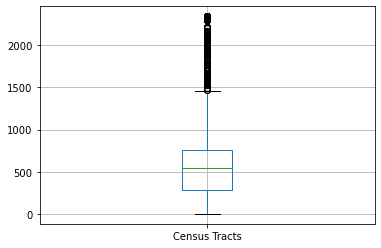

In [9]:
# Comandos para gerar um Boxplot com os dados da tabela:
import matplotlib.pyplot as plt
concatenado.boxplot(column='Census Tracts')
plt.show()